# Balle rebondissante

C'est un exemple extrait d'un tutorial pour montrer comment faire du javascript depuis un notebook. Le code source est sur [fiddle](https://jsfiddle.net/api/mdn/), le tutoriel est accessible sur [Mozilla Developer Network](https://developer.mozilla.org/en-US/docs/Web/API/Canvas_API/Tutorial/Advanced_animations).

On commence par ajouter du code HTML pour recevoir le résultat du javascript. Tout se passera dans cette fenêtre même s'il faudra exécuter la cellule qui suit celle-ci pour y voir quelque chose.

In [1]:
from IPython.display import HTML, Javascript
HTML("""<canvas id="canvas" style="border: 1px solid" width="600" height="300"></canvas>""")

Le code Javscript qui suit va être ajouté à celui du notebook. Il s'active dès que le curseur passe au-dessus du cadre qui précède.

In [2]:
Javascript("""
var canvas = document.getElementById('canvas');
var ctx = canvas.getContext('2d');
var raf;

var ball = {
  x: 100,
  y: 100,
  vx: 5,
  vy: 2,
  radius: 25,
  color: 'blue',
  draw: function() {
    ctx.beginPath();
    ctx.arc(this.x, this.y, this.radius, 0, Math.PI * 2, true);
    ctx.closePath();
    ctx.fillStyle = this.color;
    ctx.fill();
  }
};

function draw() {
  ctx.clearRect(0,0, canvas.width, canvas.height);
  ball.draw();
  ball.x += ball.vx;
  ball.y += ball.vy;
  ball.vy *= .99;
  ball.vy += .25;

  if (ball.y + ball.vy > canvas.height ||
      ball.y + ball.vy < 0) {
    ball.vy = -ball.vy;
  }
  if (ball.x + ball.vx > canvas.width ||
      ball.x + ball.vx < 0) {
    ball.vx = -ball.vx;
  }

  raf = window.requestAnimationFrame(draw);
}

canvas.addEventListener('mouseover', function(e) {
  raf = window.requestAnimationFrame(draw);
});

canvas.addEventListener('mouseout', function(e) {
  window.cancelAnimationFrame(raf);
});

ball.draw();
""")

<IPython.core.display.Javascript object>

Vous devriez voir quelque chose comme ceci :

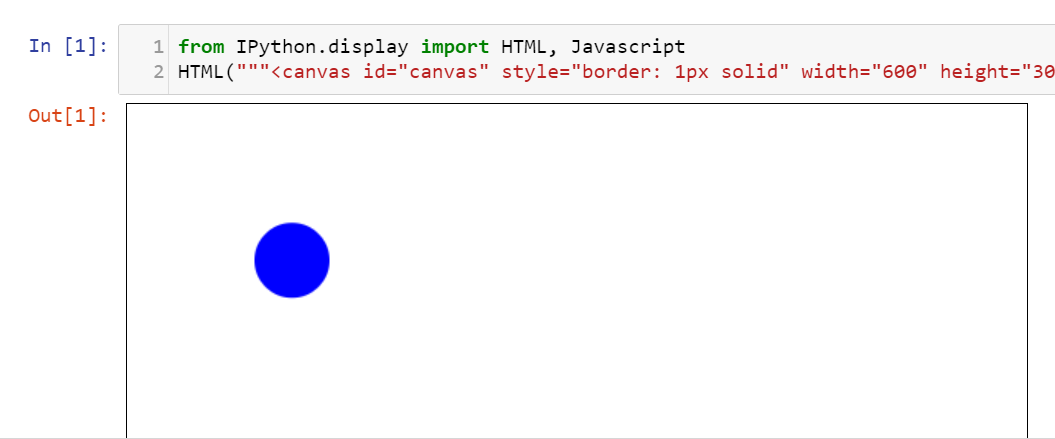

In [3]:
from pyquickhelper.helpgen import NbImage
NbImage("balle.png", width="50%")